In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new dataset
file_path = 'dataset/review_bank_digital_googleplaystore_cleaned.csv'
df = pd.read_csv(file_path)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11128\641137406.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='score', palette='viridis')


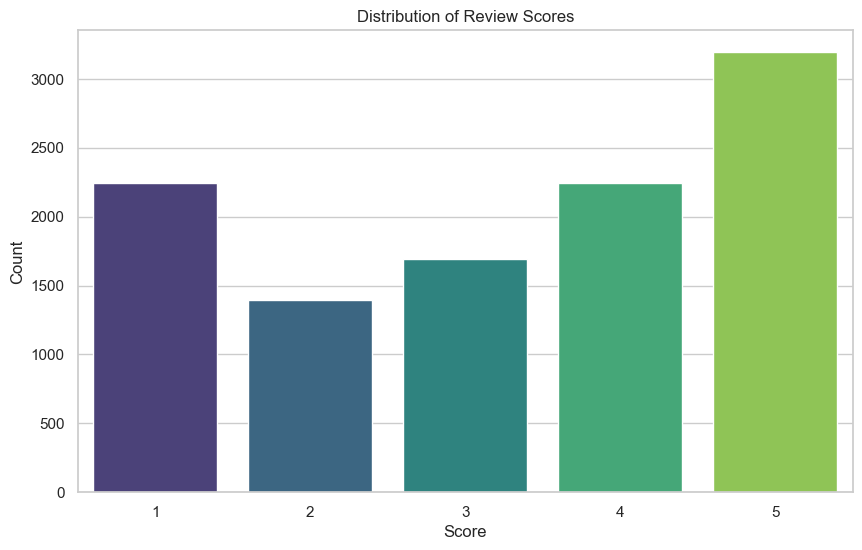

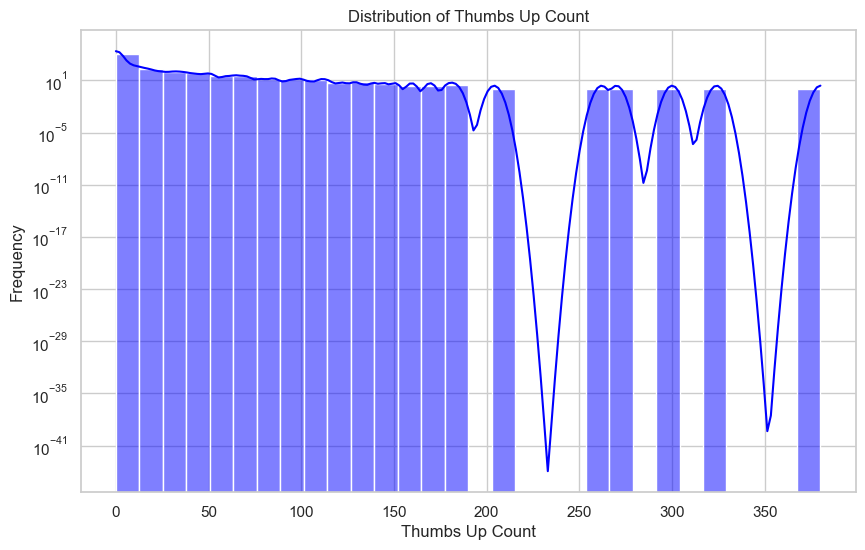

,score,thumbsUpCount
count,10776.000000,10776.000000
mean,3.254733,2.651169
std,1.514041,12.951022
min,1.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,1.000000
max,5.000000,380.000000


In [5]:


# Set up the plotting environment
sns.set(style="whitegrid")

# Summary statistics
summary_stats = df[['score', 'thumbsUpCount']].describe()

# Distribution of 'score'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score', palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# Distribution of 'thumbsUpCount'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='thumbsUpCount', bins=30, kde=True, color='blue')
plt.title('Distribution of Thumbs Up Count')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Frequency')
plt.yscale('log')  # Use a log scale to handle skewness in the distribution
plt.show()

# import ace_tools as tools; tools.display_dataframe_to_user(name="Summary Statistics of Scores and Thumbs Up Counts", dataframe=summary_stats)

summary_stats

# Time-Series Analysis
1. Number of Reviews Over Time:

This analysis looks at how many reviews were posted each month.
We group the reviews by month and count the number of reviews in each month.

2. Number of Replies Over Time:

This analysis looks at how many replies were posted each month.
We filter out rows with empty replies and group the replies by month to count them.
Since we encountered an issue with the interactive plotting tool, you can use the following code in your local environment to visualize the trends over time:

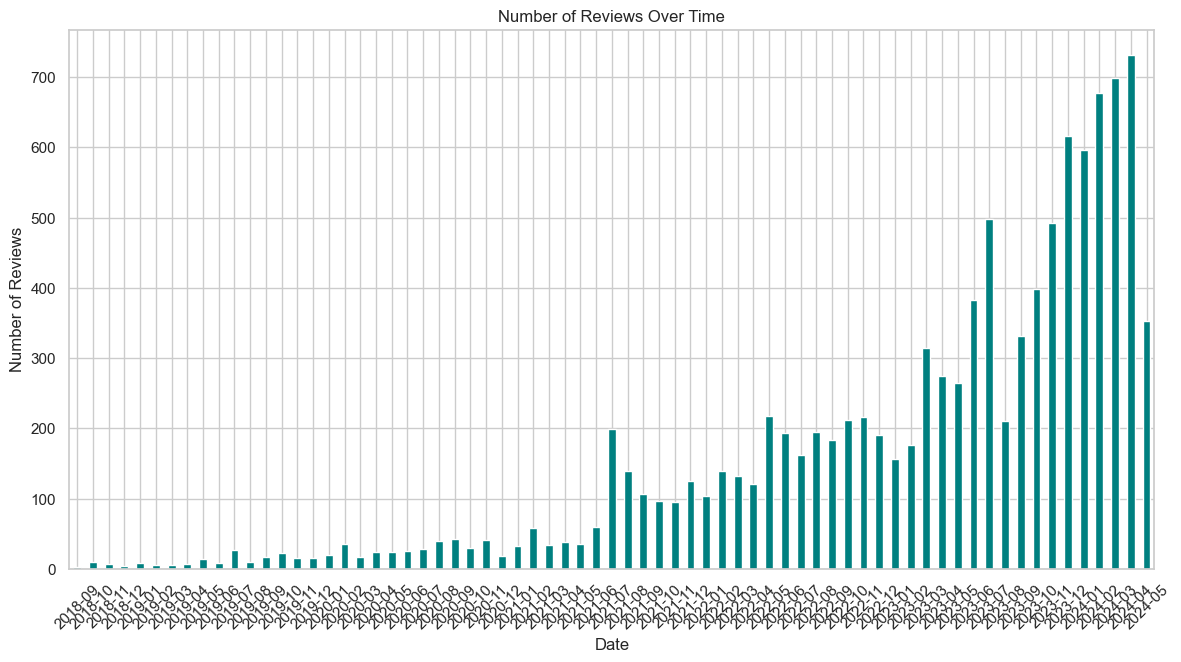

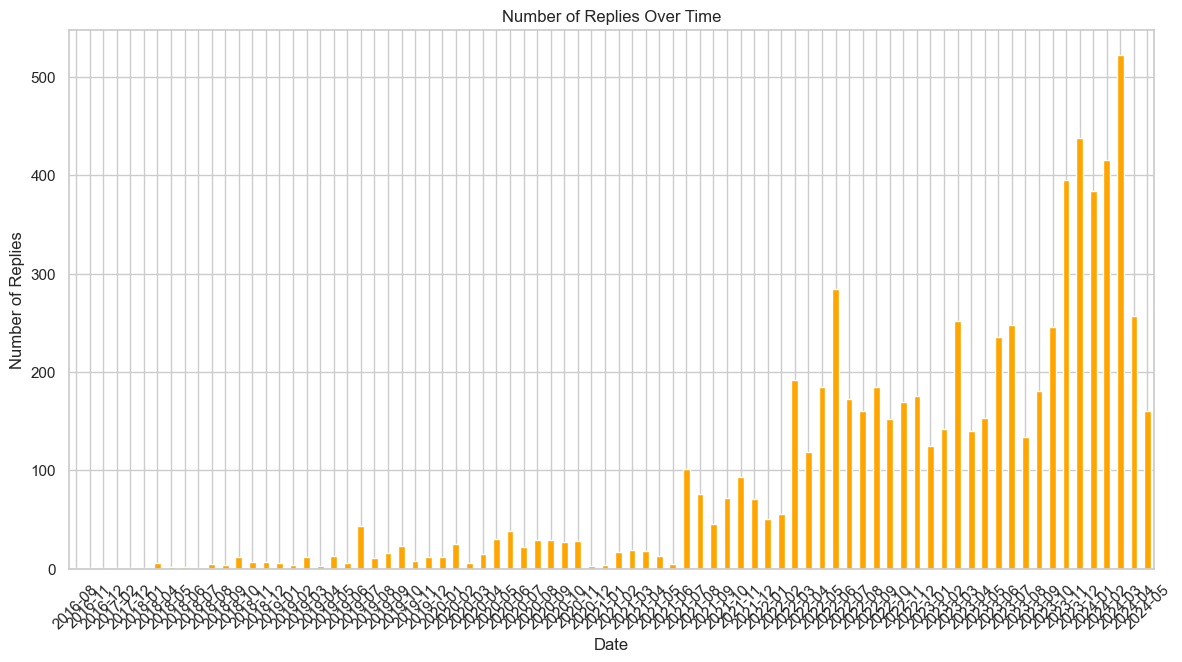

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
# df = pd.read_csv('path_to_your_cleaned_data.csv')

# Ensure 'at' and 'repliedAt' are datetime types
df['at'] = pd.to_datetime(df['at'], errors='coerce')
df['repliedAt'] = pd.to_datetime(df['repliedAt'], errors='coerce')

# Number of reviews over time
reviews_over_time = df.groupby(df['at'].dt.to_period('M')).size()

# Plot the number of reviews over time
plt.figure(figsize=(14, 7))
reviews_over_time.plot(kind='bar', color='teal')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# Number of replies over time (only consider non-empty replies)
replies_over_time = df[df['repliedAt'] != ''].groupby(df['repliedAt'].dt.to_period('M')).size()

# Plot the number of replies over time
plt.figure(figsize=(14, 7))
replies_over_time.plot(kind='bar', color='orange')
plt.title('Number of Replies Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Replies')
plt.xticks(rotation=45)
plt.show()


## Word Frequency and Sentiment Analysis:

Identify the most common words in the reviews.
Perform sentiment analysis to gauge the overall sentiment of the reviews.

In [13]:
from wordcloud import WordCloud
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...


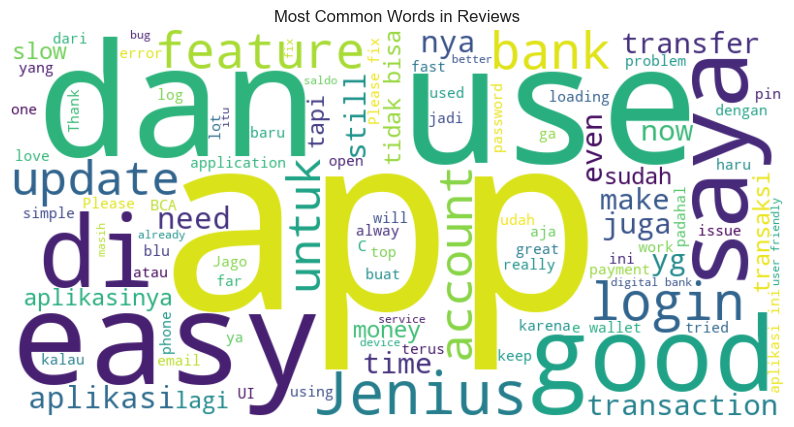

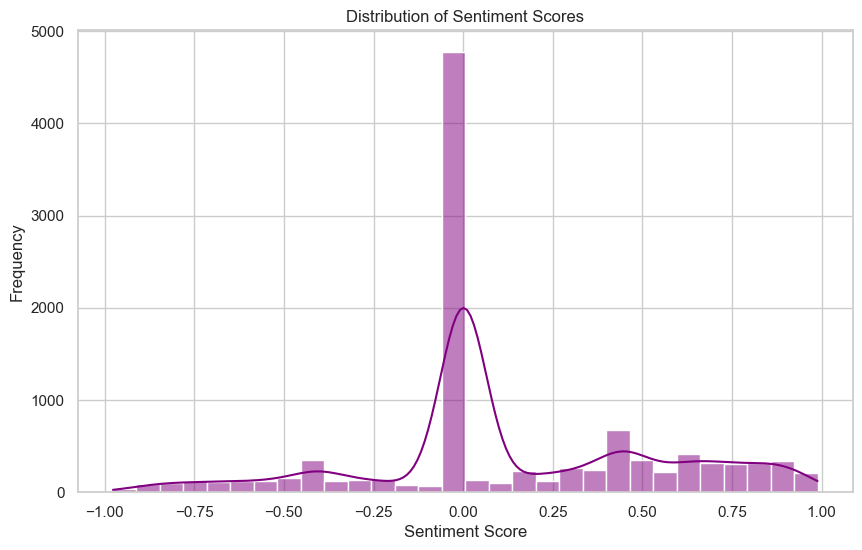

ModuleNotFoundError: No module named 'ace_tools'

In [14]:

# Download the VADER lexicon for sentiment analysis if not already downloaded
nltk.download('vader_lexicon')

# Create a Word Cloud for the review content
text = ' '.join(df['content'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()

# Perform Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='purple')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for sentiment scores
sentiment_summary = df['sentiment'].describe()

# import ace_tools as tools; tools.display_dataframe_to_user(name="Sentiment Analysis Summary", dataframe=sentiment_summary)

sentiment_summary
